# Homework 4

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import math

## Qestion 1.a

### Modified LUfactor(A) to be more better written and account for any division by 0

### **Note:** Singular Matrixes might give out weird outputs, matrices that result with something like $x_1 = x_3$ will just return 0


In [2]:
def LUfactor(A):
    # get the value of N
    N = np.shape(A)[0]
    
    # initialize L and Linv, but as a rank three tensor
    # zeroth index of each labels which one: 0,1,2,...,N
    # And then, for example, Ls[2,i,j] is the i,j element of L2
    Ls = np.empty([N,N,N])
    Linvs = np.empty([N,N,N])
    
    #...and then making them identities
    for j in range(N):
        Ls[j,:,:] = np.identity(N)
        Linvs[j,:,:] =  np.identity(N)
    
    # Initialze an array for U as A, since we will do multiplications to it
    U = np.copy(A)
    # Initialze L as an identity matrix
    L = np.identity(N)    
    
    # Copying A to do operations on it
    Anow = np.copy(A)
    
    """
    Start the routine now
    """
    
    # j loop takes over all the Ls and Linvs
    for j in range(N):
        div = Anow[j,j]
        if div != 0:
            Ls[j,j,j] = Ls[j,j,j]/div
            
            # Assign appropriate L
            for k in range(j+1,N):
                Ls[j,k,j] = -Anow[k,j]/div

            # Assign appropriate L    
            for k in range(j,N):
                Linvs[j,k,j] = Anow[k,j]  
                 
            # Operate on Anow, and repeat
            Anow = np.dot(Ls[j,:,:],Anow)

    
    """
    Multiply everything togeter
    """
    
    for k in range(N):
        # If the diagonal element is not zero or nan, multiply
        if not np.isnan(Linvs[k,k,k]) and Linvs[k,k,k] != 0:
            L = np.dot(L,Linvs[k,:,:])
        # Get U
        U = np.dot(Ls[k,:,:],U)
        
    # Return our decomposition
    return L, U

## Question 1.b

In [3]:
def back_solve(U: np.ndarray, b: np.ndarray) -> np.ndarray:
    """
        Uses backsubstitution to solve the system Ux = b for x.

    Args:
        U (np.ndarray): The upper triangular matrix
        b (np.ndarray): The right hand side vector

    Returns:
        np.ndarray: The solution vector x
    """
    # Get the number of rows
    N = len(b)
    
    # Define an array to hold the solution
    x = np.zeros(N, float)
    
    # Run a loop that starts from the last index and goes all the way up to 0
    for m in range(N - 1, -1, -1):
        # Do backsubstitution based on values of x found in the previous loop iterations
        
        # Subtract the dot product of the upper triangular row and the solution vector from the current element of the solution vector
        x[m] = b[m] - np.dot(U[m, m+1:], x[m+1:])
        
        # Divide by the diagonal element, but only if it's not zero
        if U[m, m] != 0:
            x[m] /= U[m, m]

    return x

## Question 1.c

In [4]:
def forward_solve(L: np.ndarray, b: np.ndarray) -> np.ndarray:
    """
        Uses forward substitution to solve the system Lx = b for x.
        
    Args:
        L (np.ndarray): The lower triangular matrix
        b (np.ndarray): The right hand side vector

    Returns:
        np.ndarray: The solution vector x
    """
    # Get the number of rows
    N = len(b)
    
    # Define an array to hold the solution
    x = np.empty(N,float)
    
    # Run a loop that starts from the last index and goes all the way up to 0
    for m in range(N):
        # Do forward substitution based on values of x found in the previous loop iterations
        
        # Subtract the dot product of the lower triangular row and the solution vector from the current element of the solution vector
        x[m] = b[m] - np.dot(L[m, :m], x[:m])
        # Divide by the diagonal element, but only if it's not zero
        if L[m, m] != 0:
            x[m] /= L[m, m]

    return x

## Question 1.d

In [5]:
def my_linear_solver(A: np.ndarray, v: np.ndarray) -> np.ndarray:
    """
        Solves the system Ax = v for x using LU decomposition.

    Args:
        A (np.ndarray): The matrix A that we want to decompose
        v (np.ndarray): The solution vector

    Returns:
        np.ndarray: The vector of solutions x
    """
    L, U = LUfactor(A)
    y = forward_solve(L, v)
    x = back_solve(U, y) 
    
    return x

### Testing different square matrixes to see my_linear_solver(A, v) works

In [6]:
A = np.array([[3,2,3,1], [1,3,2,5], [2,2,7,2], [5,1,4,3]] , float)
v = np.array([31, 55, 57, 49], float)

s1 = my_linear_solver(A, v)
# assert to check if the solution is correct by comparing it to the numpy solver
print(s1)

A = np.array([[2, 1], [1, 2]], float)
v = np.array([3, 3], float)

s2 = my_linear_solver(A, v)
# assert to check if the solution is correct by comparing it to the numpy solver
print(s2)   

# This is a singular matrix, so it will give out a weird solution
A = np.array([[1, 2, 3], [4, 3, 6], [7, 8, 9]], float)
v = np.array([6, 15, 24], float)

s3 = my_linear_solver(A, v)
# assert to check if the solution is correct by comparing it to the numpy solver
print(s3)

A = np.array([[1, 2, 3, 6], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]], float)
v = np.array([30, 70, 110, 150], float)

s4 = my_linear_solver(A, v)
# assert to check if the solution is correct by comparing it to the numpy solver
print(s4)


[1. 3. 5. 7.]
[1. 1.]
[1.50000000e+00 2.22044605e-16 1.50000000e+00]
[-10.  20.   0.   0.]


## Question 2.a

$$
V(1, 0) = -6V
$$
$$
V(0, -1) = 23V
$$
$$
V(-1, 0) = 32V
$$

turning the previous into into a set of linear equations

$$
V = k\frac{q}{r}
$$

where $k$ is a constant, $q$ is a charge and $r$ is the distance between the particles

$$
V_0 = k\bigg[\frac{q_0}{1} + \frac{q_1}{1} + \frac{q_2}{\sqrt{5}} \bigg]
$$
$$
V_1 = k\bigg[\frac{q_0}{\sqrt{5}} + \frac{q_1}{1} + \frac{q_2}{1} \bigg]
$$
$$
V_2 = k\bigg[\frac{q_0}{\sqrt{5}} + \frac{q_1}{\sqrt{5}} + \frac{q_2}{1} \bigg]
$$

rewriting the above as matrix-vector operations

$$
\begin{gather}
k \begin{bmatrix}
1 & 1 & \frac{1}{\sqrt{5}} \\
\frac{1}{\sqrt{5}} & 1 & 1 \\
\frac{1}{\sqrt{5}} & \frac{1}{\sqrt{5}} & 1 \\
\end{bmatrix}
\begin{bmatrix}
q_0 \\
q_1 \\
q_2 \\
\end{bmatrix}
\: = \:
\begin{bmatrix}
-6 \\
23 \\
32 \\
\end{bmatrix}
\end{gather}
$$

In [7]:
# define k, aka Coulomb's constant 
k = 8.99 * 10e9 # N ⋅ m 2 /C 2

# define the matrix A
A = np.array([
    [1/np.sqrt(5), 1, 1],
    [1/np.sqrt(5), 1/np.sqrt(5), 1],
    [1, 1/np.sqrt(5), 1/np.sqrt(5)]
], float)

C = k*A 
V = np.array([-6, 23, 32], float)

### Using my_linear_solver(A, v) to compute the result and comparing it to np.linalg.solver

In [8]:
mls = my_linear_solver(C, V)
np_ls = np.linalg.solve(C, V)

# run an assert to check if the solution is correct by comparing it to the numpy solver
assert np.allclose(mls, np_ls)

print(mls)
print(np_ls)

[ 4.82248075e-10 -5.83553869e-10  3.01145150e-10]
[ 4.82248075e-10 -5.83553869e-10  3.01145150e-10]


# Question 3.a

We want to write the second derivative as form of matrix

$$
\frac{d^2}{dx}f(x) \bigg\vert_{x=x_j} \simeq \frac{f_{j-1} -2f_j + f_{j+1}}{h^2}
$$

we have a vector $f$ that our matrix acts upon

So we want the following

let $A$ me the matrix operator
let $f$ be the vector that holds the functions we want to apply the derivative over
let $f'$ be the the solution vector that holds the second derivatives

we have the following acting upon a function $f_i$
$$
\frac{1}{h^2} - \frac{2}{h^2} + \frac{1}{h^2}
$$

so we will have the following

$$
\begin{gather}

\begin{bmatrix}
- \frac{2}{h^2} & \frac{1}{h^2} & 0 & 0 & \dots & 0 \\
\frac{1}{h^2} & - \frac{2}{h^2}  & \frac{1}{h^2} & 0 & \dots & 0 \\
0 & \frac{1}{h^2} & - \frac{2}{h^2} & \frac{1}{h^2} & \dots & 0\\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots\\
0 & 0 & 0 & \dots & \frac{1}{h^2} & - \frac{2}{h^2}
\end{bmatrix}
\begin{bmatrix}
f_0 \\
f_1 \\
f_2 \\
\vdots \\
f_{n-1}
\end{bmatrix}
\: = \:
\begin{bmatrix}
f'_0 \\
f'_1 \\
f'_2 \\
\vdots \\
f'_{n-1}
\end{bmatrix}
\end{gather}
$$


# Question 3.b

In [9]:
def d2dx2(a: float, b: float, N: int) -> np.ndarray:
    """
        Returns the matrix A that holds the second derivative operations.
    Args:
        a (float): The lower bound of the interval
        b (float): The upper bound of the interval
        N (int): The number of points to use in the discretization

    Returns:
        np.ndarray: The matrix A
    """
    
    # define the matrix A that holds the second derivative operations
    A = np.zeros([N, N])
    
    # define the step size
    h = (b-a)/N  

    # set the first and last rows of A
    for i in range(N-1):
        # every diagonal element is -2/h^2
        A[i , i] = -2.0 / (h**2)
        # the element to the right of the diagonal is 1/h^2
        A[i , i + 1] = 1.0 / (h**2)
        # the element to the left of the diagonal is 1/h^2
        A[i+1,i] = 1.0 / (h**2)
        
    # set the last row of A
    A[N-1,N-1] = -2.0 / (h**2)
    
    return A

### Making sure d2dx2 works fine

In [10]:
A = d2dx2(0, 1, 5)
print(A)

[[-50.  25.   0.   0.   0.]
 [ 25. -50.  25.   0.   0.]
 [  0.  25. -50.  25.   0.]
 [  0.   0.  25. -50.  25.]
 [  0.   0.   0.  25. -50.]]


## The Hamiltonian

$$
\hat{H}\psi(x) = E\psi(x)
$$

Writing it in full form

$$ 
-\frac{\hbar^2}{2m}\nabla^2\psi(x) + U(x)\psi(x) = E\psi(x)
$$

Since we only dealing in the $x$ dimension we only care for the partial differention with respect to $x$

$$
-\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x)}{\partial x}  + U(x)\psi(x) = E\psi(x)
$$

We have that $U(x) = 0$

$$
-\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x)}{\partial x}  = E\psi(x)
$$

So converting to get matrix form using our matrix from before, we have:

$$
\begin{gather}
\bar{H}\vec{\Psi} = -\frac{\hbar^2}{2m}
\begin{bmatrix}
\psi_0 \\
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_{n-1}
\end{bmatrix}
\begin{bmatrix}
- \frac{2}{h^2} & \frac{1}{h^2} & 0 & 0 & \dots & 0 \\
\frac{1}{h^2} & - \frac{2}{h^2}  & \frac{1}{h^2} & 0 & \dots & 0 \\
0 & \frac{1}{h^2} & - \frac{2}{h^2} & \frac{1}{h^2} & \dots & 0\\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots\\
0 & 0 & 0 & \dots & \frac{1}{h^2} & - \frac{2}{h^2}
\end{bmatrix}
\: = \:
\begin{bmatrix}
E_0 \\
E_1 \\
E_2 \\
\vdots \\
E_{n-1}
\end{bmatrix}
\end{gather}
$$

In [11]:
def Hamiltonian(N: int) -> np.ndarray:
    """
        Returns the Hamiltonian matrix for a particle in a box.
        
    Args:
        N (int): The number of points to use in the discretization
        
    Returns:
        np.ndarray: The Hamiltonian matrix
    """
    
    # define the value of h-bar and the mass of a proton
    h_bar = 1.054571817e-34 
    proton_mass = 1.67262192e-27 

    L = 1e-14
    # setting our values for a and b based on the question
    a = -L 
    b = L  

    return -(h_bar**2 / (2 * proton_mass)) * d2dx2(a, b, N)

## $L= 1 \times 10^{-14}$ or in python syntax 1e-14
## $N = 200$
## $h = 2L / N$

# Question 3.c

We have that the standard energy values of a free partile bounded by a box of size $2L$

$$
E_n = \frac{n^2\pi^2\hbar^2}{2m(2L)^2}
$$

In [12]:
def E_n(n: np.ndarray) -> np.ndarray:
    """
        Returns the energy of the nth state of a particle in a box.
    
    Args:
        n (np.ndarray): The state of the particle in a box
        
    Returns:
        np.ndarray: The energy of the nth state
    """
 
    # define the value of h-bar and the mass of a proton
    h_bar = 1.054571817e-34 
    proton_mass = 1.67262192e-27 

    L = 1e-14
    
    return ((n * np.pi * h_bar)**2) / (2*proton_mass * (2 * L)**2)

### Comparing The Hamiltonian Energies to the standard energy states of the first 100 states

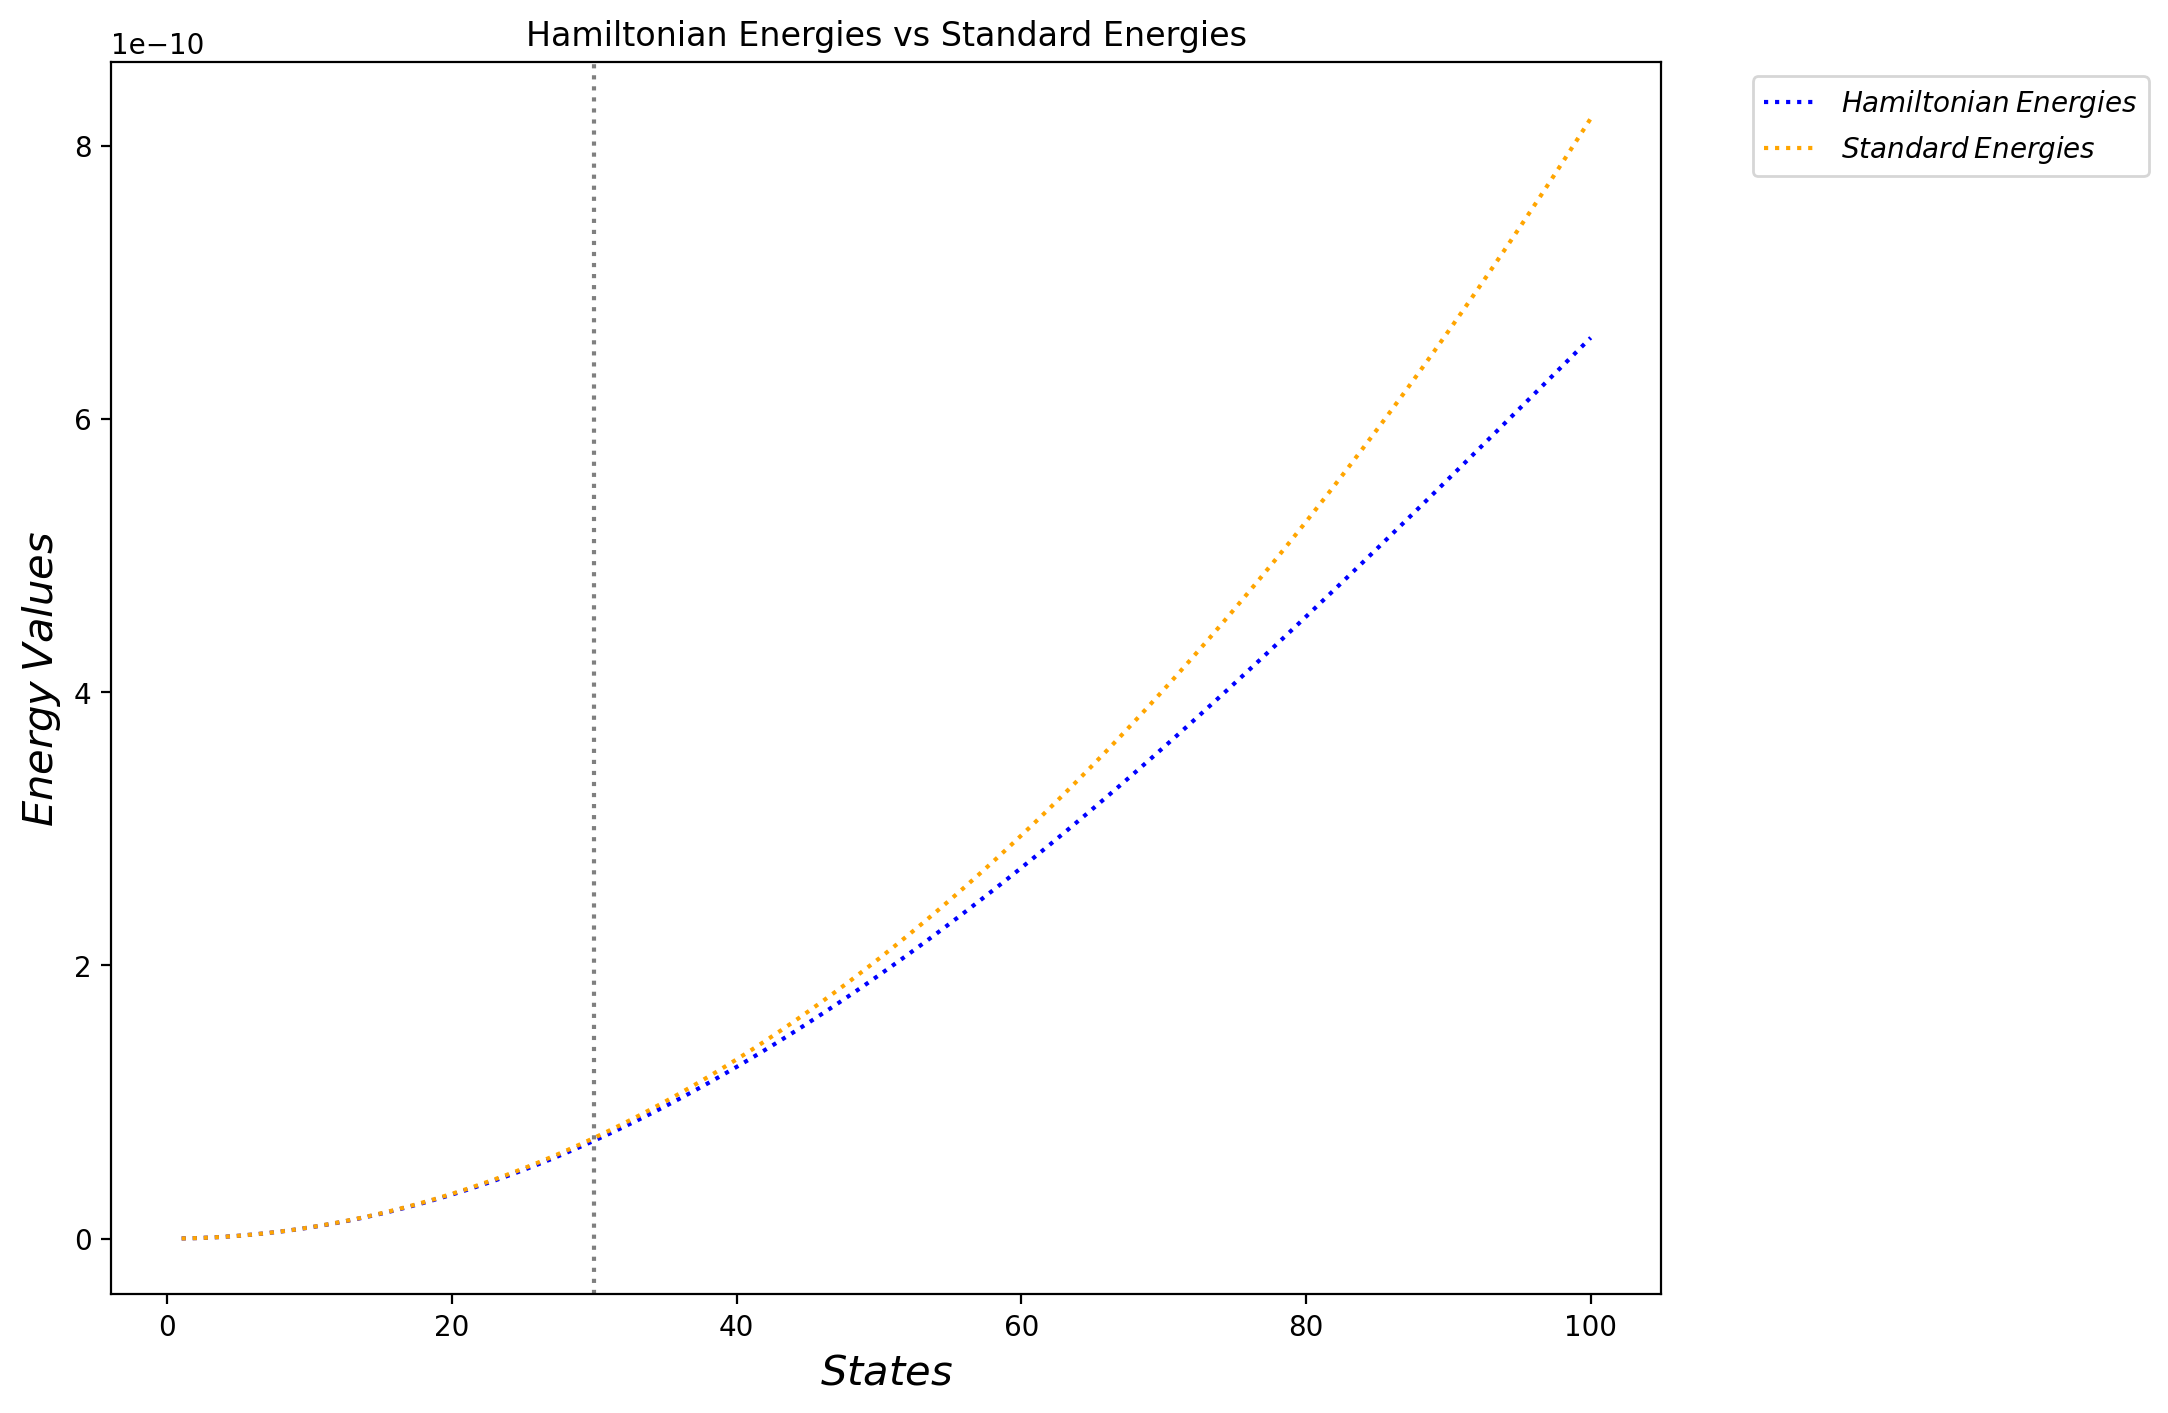

In [13]:
N = 200
H = Hamiltonian(N)
H_val, eig_functions = np.linalg.eig(H)

# Sorting
idx = H_val.argsort()[::1]   
H_val = H_val[idx]
eig_functions = eig_functions[:,idx]

# number of states
states = np.linspace(1, 100, 100, endpoint=True)
E_val = E_n(states)

plt.figure(figsize=(10,8), dpi=200)
plt.plot(states, H_val[:100], c='blue', ls=':', label=r'$Hamiltonian\:Energies$')
plt.plot(states, E_val, c='orange', ls=':', label=r'$Standard\:Energies$')

plt.title('Hamiltonian Energies vs Standard Energies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('$States$', fontsize=15)
plt.ylabel('$Energy\:Values$', fontsize=15)

# Find the index where the two curves intersect
# idx = np.argmin(np.abs(H_val[:100] - E_val))

# Draw a dotted line at the intersection point
plt.axvline(x=30, alpha=0.5, c='black', linestyle='dotted')

# Add the energy value at the intersection point
# plt.text(states[idx] - 5, H_val[idx], f"Intersection: {idx}", fontsize=12, ha='right', va='bottom')

### The standard energy values and the eigen values of the Hamiltonian for the first 100 states seem to deviate after 30 states. They probably start to diverge due to the accuracy of our second derivative approximation.

# Question 3.d

Text(0, 0.5, '$|ψ(x)|^2$')

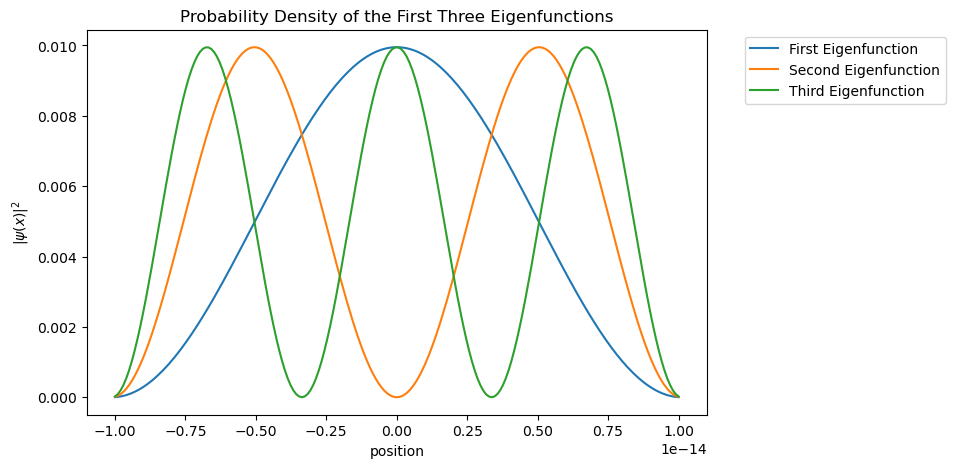

In [15]:
plt.figure(figsize=(8,5), dpi=100)
L = 1e-14  

# we get the x values from 0 to 100
position = np.linspace(-L, L, N)

# we plot the first three eigenfunctions
# we square the absolute value of the eigenfunctions to get the probability density
# to get the eigenfunctions, we need to take the columns of the eigenvector matrix
# the first column is the first eigenfunction, the second column is the second eigenfunction, etc.
plt.plot(position, (abs(eig_functions[:,0]))**2, label='First Eigenfunction') 
plt.plot(position, (abs(eig_functions[:,1]))**2, label='Second Eigenfunction')
plt.plot(position, (abs(eig_functions[:,2]))**2, label='Third Eigenfunction')

plt.title('Probability Density of the First Three Eigenfunctions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('position')
plt.ylabel('$|ψ(x)|^2$')

A potential energy matrix function can be defined as follows
$$
\begin{gather}
\hat{U}(x) \: \simeq \:
\begin{bmatrix}
1 & 0 & 0 & \dots & 0 \\
0 & 1 & 0 & \dots & 0 \\
0 & 0 & 1 & \dots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & 0 & 0 & \dots & 1
\end{bmatrix}
\begin{bmatrix}
U_0 \\
U_1 \\
U_2 \\
\vdots \\
U_{n-1}
\end{bmatrix}
\end{gather}
$$

# Question 3.e

Consider a proton confined in a Harmonic oscillator well potential

$$
U(x) = \frac{1}{2}m\omega^2x^2
$$

where $\omega = 5 \times 10^{22}$

Energy eigenvalues are given by

$$
E_n = \bigg(n + \frac{1}{2}\bigg)\hbar\omega
$$

we have that our potential energy function writen in matrix form is


$$
\begin{gather}
\hat{U}(x) \: \simeq \:
\frac{1}{2}m\omega^2
\begin{bmatrix}
1 & 0 & 0 & \dots & 0 \\
0 & 1 & 0 & \dots & 0 \\
0 & 0 & 1 & \dots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & 0 & 0 & \dots & 1
\end{bmatrix}
\begin{bmatrix}
x_0^2 \\
x_1^2 \\
x_2^2 \\
\vdots \\
x_{n-1}^2
\end{bmatrix}
\end{gather}
$$


The full Hamiltonian equation including the Potential is



In [16]:
def Full_Hamiltonian(N: int, x_arr: np.ndarray) -> np.ndarray:
    """
        Returns the Hamiltonian matrix for a particle in a box.
        This function is different from the previous one because it includes the potential function.
        
    Args:
        N (int): The number of points to use in the discretization
        x_arr (np.ndarray): The array of x values
        
    Returns:
        np.ndarray: The Hamiltonian matrix
    """
    
    # define the value of h-bar and the mass of a proton
    h_bar = 1.054571817e-34 
    proton_mass = 1.67262192e-27 
    omega = 5e22

    L = 1e-14
    # setting our values for a and b based on the question
    a = -L 
    b = L  
    
    # set the identity matrix for the potential 
    U = np.identity(N)
    # calculate the constant terms for the potential 
    const = 0.5 * proton_mass * omega**2 
    # calculate the potential matrix
    for i in range(N):
        U[i,i] = const * x_arr[i]**2
        
    # calculate the Kinetic energy matrix
    K = (-h_bar**2 / (2 * proton_mass)) * d2dx2(a, b, N)

    return K + U

def Full_E_n(N: np.ndarray) -> np.ndarray:
    """
        Returns the energy of the nth state of a particle in a box.

    Args:
        N (int): The number of points to use in the discretization

    Returns:
        float: The energy of the particle
    """
    h_bar = 1.054571817e-34 
    omega = 5e22 
    
    return (N + 0.5) * h_bar * omega

### Calculate the full Hamiltonian and Full Energy 

### Get the eigen values and vectors of the full Hamiltonian

In [17]:
# Set the bounds of the box
L = 1e-14
a = -L
b = L
N = 200

# set the number of points
states = np.linspace(0,100,100)

# define the x values
positions = np.linspace(a,b,N)

# Get the Hamiltonian matrix
FH = Full_Hamiltonian(N, positions)

# get the eigenvalues and eigenvectors
FH_val, FH_vect = np.linalg.eig(FH)
# Sorting
idx = FH_val.argsort()[::1]   
FH_val = FH_val[idx]
FH_vect = FH_vect[:,idx]

# get the energy values
FE_val = Full_E_n(states)
FE_val.sort()

### plot the energy and Hamiltonian values

Text(0.0, 2.648357371788411e-12, 'Intersection: ~45')

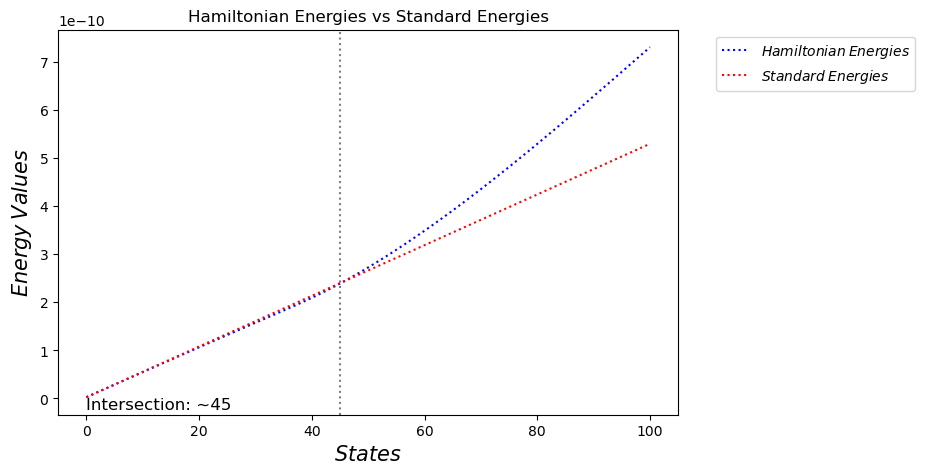

In [18]:
plt.figure(figsize=(8,5), dpi=100)

plt.plot(states, FH_val[:100], c='blue', ls=':', label='$Hamiltonian\:Energies$')
plt.plot(states, FE_val, c='red', ls=':', label='$Standard\:Energies$')

plt.xlabel(r'$States$', fontsize=15)
plt.ylabel(r'$Energy\:Values$', fontsize=15)
plt.title('Hamiltonian Energies vs Standard Energies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Find the index where the two curves intersect
idx = np.argmin(np.abs(FH_val[:100] - FE_val))

# Draw a dotted line at the intersection point
plt.axvline(x=45, alpha=0.5, c='black', linestyle='dotted')

# Add the energy value at the intersection point
plt.text(states[idx], FH_val[idx], f"Intersection: ~{45}", fontsize=12, ha='left', va='top')

### Both graphs seem to deviate at around state 45. This may be because we are only using the first few terms of the Taylor Expansion. It may also be because our model for the energy of the particle becomes less accurate as it nears the edges of the box.

# Question 3.f

Text(0, 0.5, '$|ψ(x)|^2$')

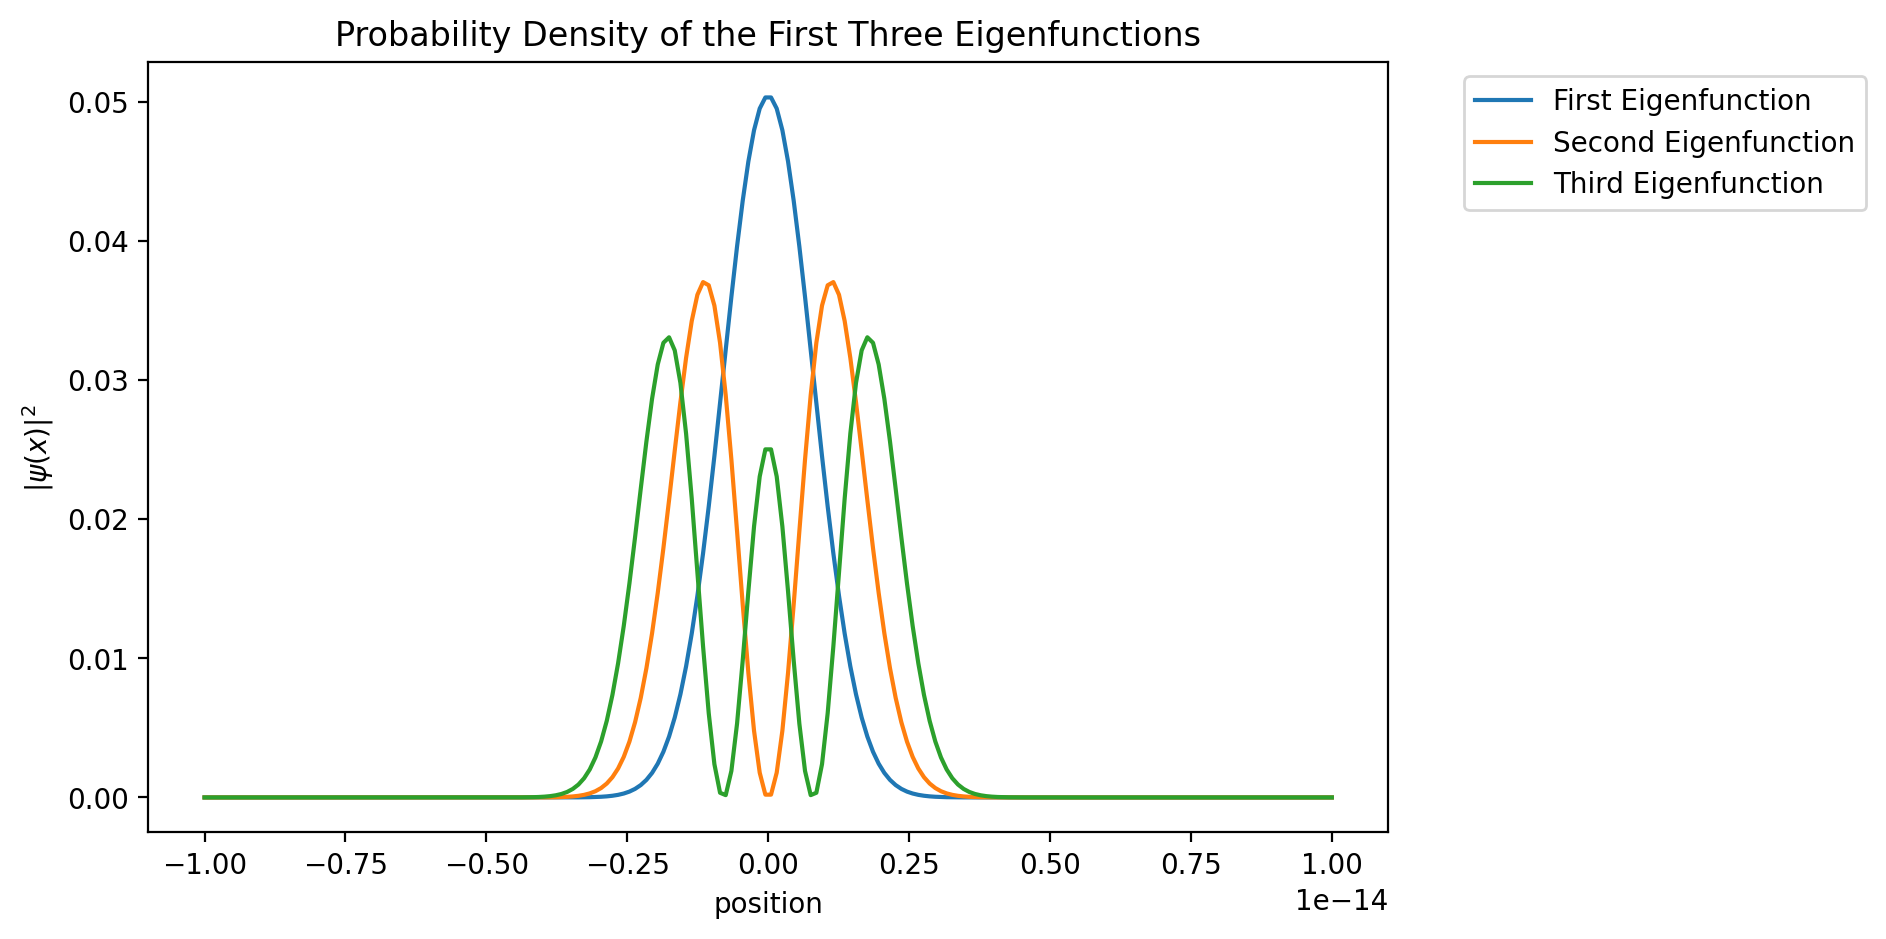

In [19]:
plt.figure(figsize=(8,5), dpi=200)

# we plot the first three eigenfunctions
# we square the absolute value of the eigenfunctions to get the probability density
# to get the eigenfunctions, we need to take the columns of the eigenvector matrix
# the first column is the first eigenfunction, the second column is the second eigenfunction, etc.
plt.plot(position, (abs(FH_vect[:,0]))**2, label='First Eigenfunction')
plt.plot(position, (abs(FH_vect[:,1]))**2, label='Second Eigenfunction')
plt.plot(position, (abs(FH_vect[:,2]))**2, label='Third Eigenfunction')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Probability Density of the First Three Eigenfunctions')

plt.xlabel('position')
plt.ylabel('$|ψ(x)|^2$')

### Comparing to HW3 3.d

Text(0, 0.5, '$|ψ(x)|^2$')

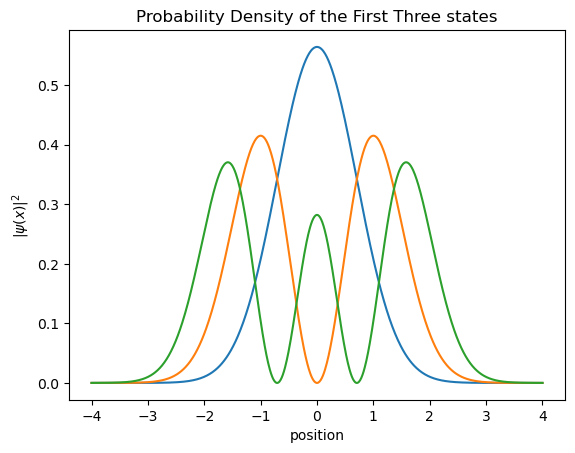

In [24]:
# comparing to HW 3

def H(n: int, x: np.ndarray):
    """
        Computes the Hermite polynomial of order n at x.

    Args:
        n (int): the order of the Hermite polynomial
        x (np.ndarry): the values at which to evaluate the Hermite polynomial

    Returns:
        float | np.ndarray: the value(s) of the Hermite polynomial of order n at x
    """
    
    if n == 0:
        return 1
    if n == 1:
        return 2*x
    else:
        return 2*x*H(n-1,x) - 2*(n-1)*H(n-2,x)
    
def psi(n: int, x: np.ndarray):
    """ 
        Computes the wavefunction of the nth state of a particle in a box.
        
    Args:
        n (int): The state of the particle in a box
        x (np.ndarray): The array of x values
        
    Returns:
        float | np.ndarray: The wavefunction of the nth state
    """
    coef = (2**n * np.math.factorial(n)*math.sqrt(np.pi))
    coef = 1/math.sqrt(coef)
    expon = np.exp(-x**2 / 2)
    return coef*expon*H(n,x)

position = np.linspace(-4,4,800,endpoint = True)

plt.plot(position,abs(psi(0,position))**2)
plt.plot(position,abs(psi(1,position))**2)
plt.plot(position,abs(psi(2,position))**2)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Probability Density of the First Three states')

plt.xlabel('position')
plt.ylabel('$|ψ(x)|^2$')

### As we can, by comparing to our 3.f to HW 3 3.d we see that we get the same probability although 3.f is a bit more squish towards the center than HW 3 3.d 